**Import necessary Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read Fandango_scrape.csv into data frame fandango**


In [8]:
fandango = pd.read_csv('fandango_scrape.csv')

**Explore fandango data frame**

In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [10]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [11]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Explore relationship between rating and votes with scatterplot**


<Axes: xlabel='RATING', ylabel='VOTES'>

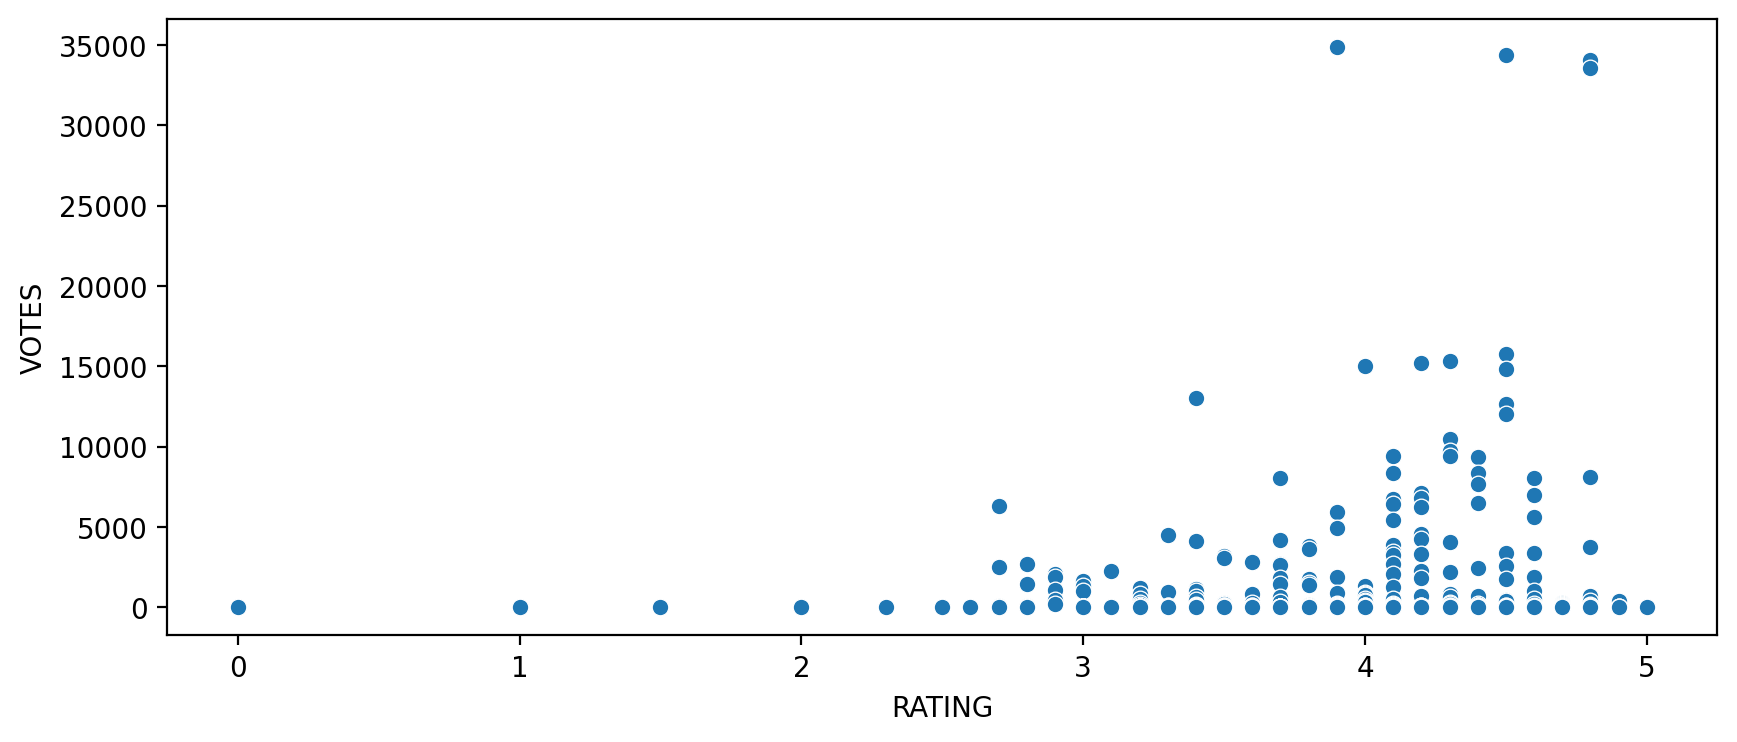

In [15]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES')

Calculate co-relation between columns

In [17]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Create a new column 'YEAR' by strippinng year from the title

In [18]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))

In [19]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


Extract number of movies per year

In [22]:
fandango.groupby('YEAR')['FILM'].count()

YEAR
1964      1
2012      1
2014     23
2015    478
2016      1
Name: FILM, dtype: int64

In [23]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

Visualize the count of movies per year with a plot

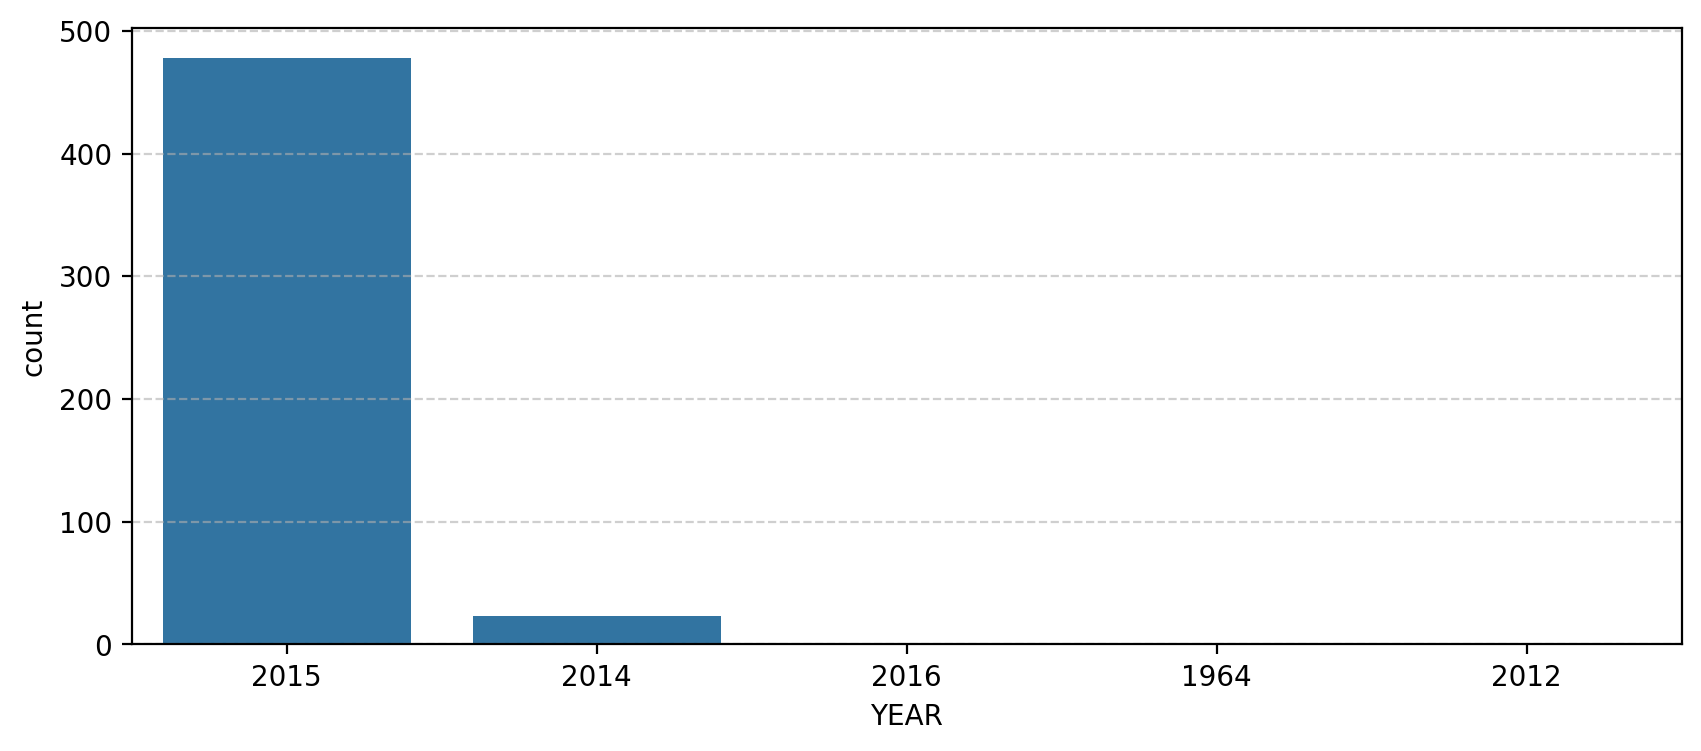

In [31]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.countplot(data = fandango, x = 'YEAR')
plt.grid(True, axis = 'y', ls = '--', alpha = 0.6)

Top 10 movies with the highest number of votes

In [36]:
top_ten_film_byvotes = fandango.sort_values('VOTES', ascending=  False).loc[0:9]

In [37]:
top_ten_film_byvotes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Number of movies with zero votes**

In [39]:
len(fandango[fandango['VOTES'] == 0])

69

**Create dataframe of the movies excluding movies with zero votes**

In [42]:
rated_movies = fandango[fandango['VOTES'] > 0]

In [43]:
rated_movies

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**Create a KDE plot for rating(True rating) and stars(Fandango rating)

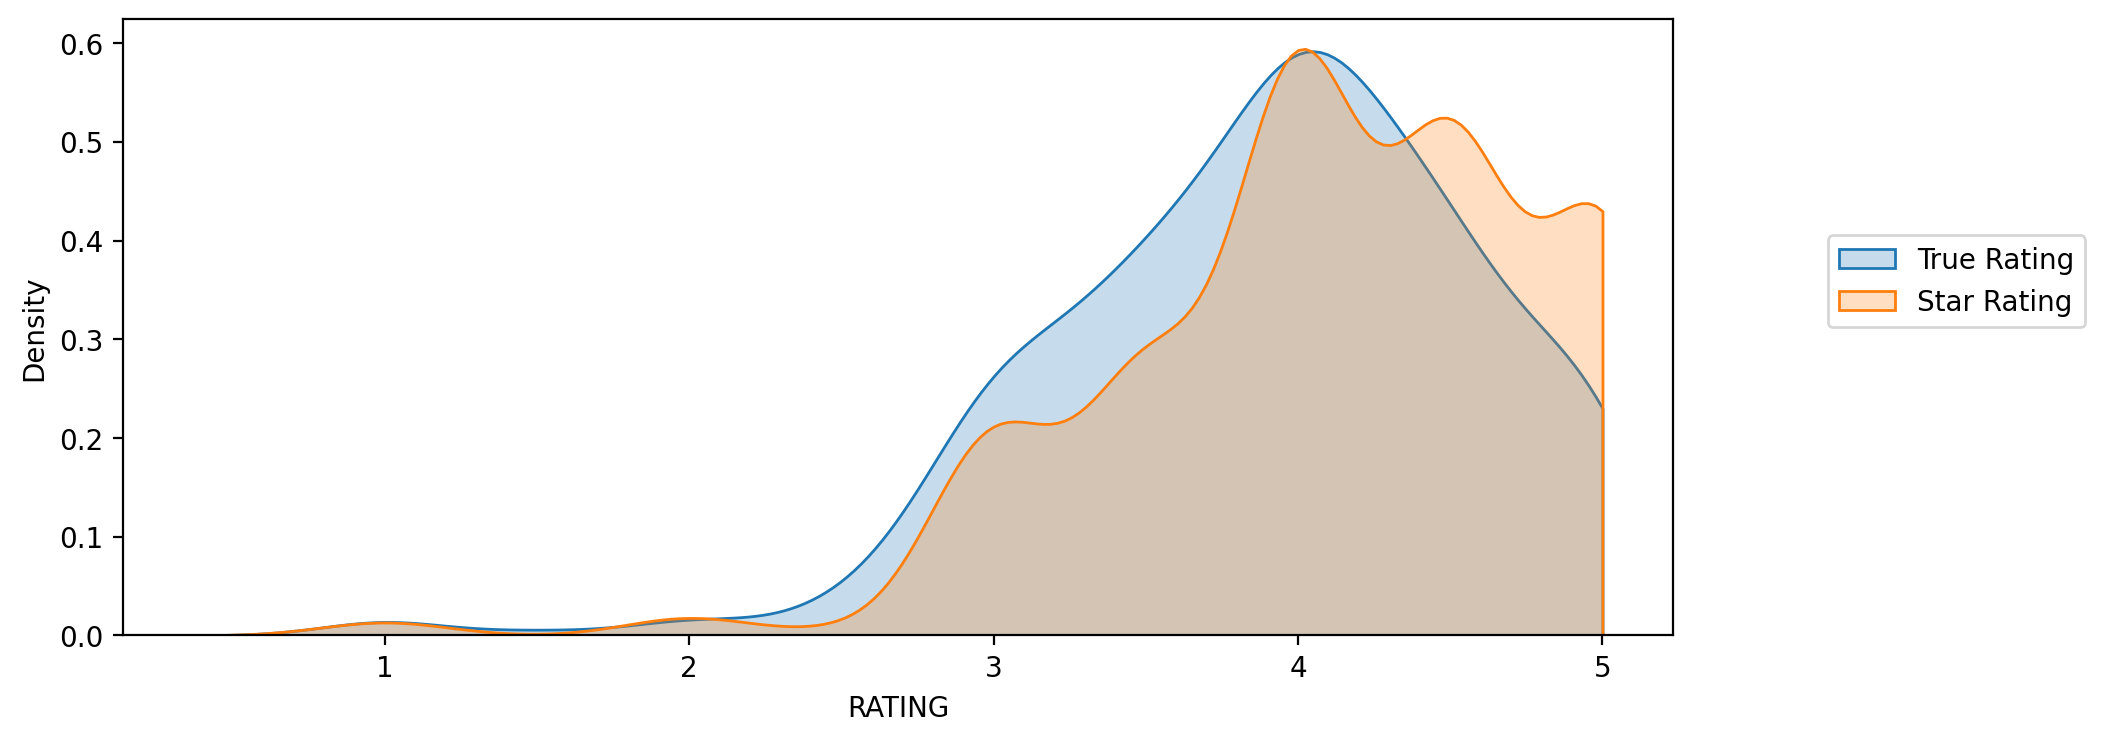

In [68]:
plt.figure(figsize=(10,4), dpi = 200)
sns.kdeplot(data = rated_movies, x = 'RATING', clip= [0,5], fill = True, label = 'True Rating')
sns.kdeplot(data = rated_movies, x = 'STARS', clip= [0,5], fill = True, label = 'Star Rating')
plt.legend(loc=(1.1,0.5))

**We can see discrepancy from above graph. Quantify that discrepancy by adding STARS_DIFF column**

In [74]:
rated_movies['STARS_DIFF'] =( rated_movies['STARS'] - rated_movies['RATING']).round(2)

C:\Users\abhisek bhujel\AppData\Local\Temp\ipykernel_2896\2171589738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_movies['STARS_DIFF'] =( rated_movies['STARS'] - rated_movies['RATING']).round(2)


In [75]:
rated_movies

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Create a count plot showing number of times certain differences occurs (STARS_DIFF)**

C:\Users\abhisek bhujel\AppData\Local\Temp\ipykernel_2896\3836013986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(rated_movies, x = 'STARS_DIFF',  palette= 'magma')


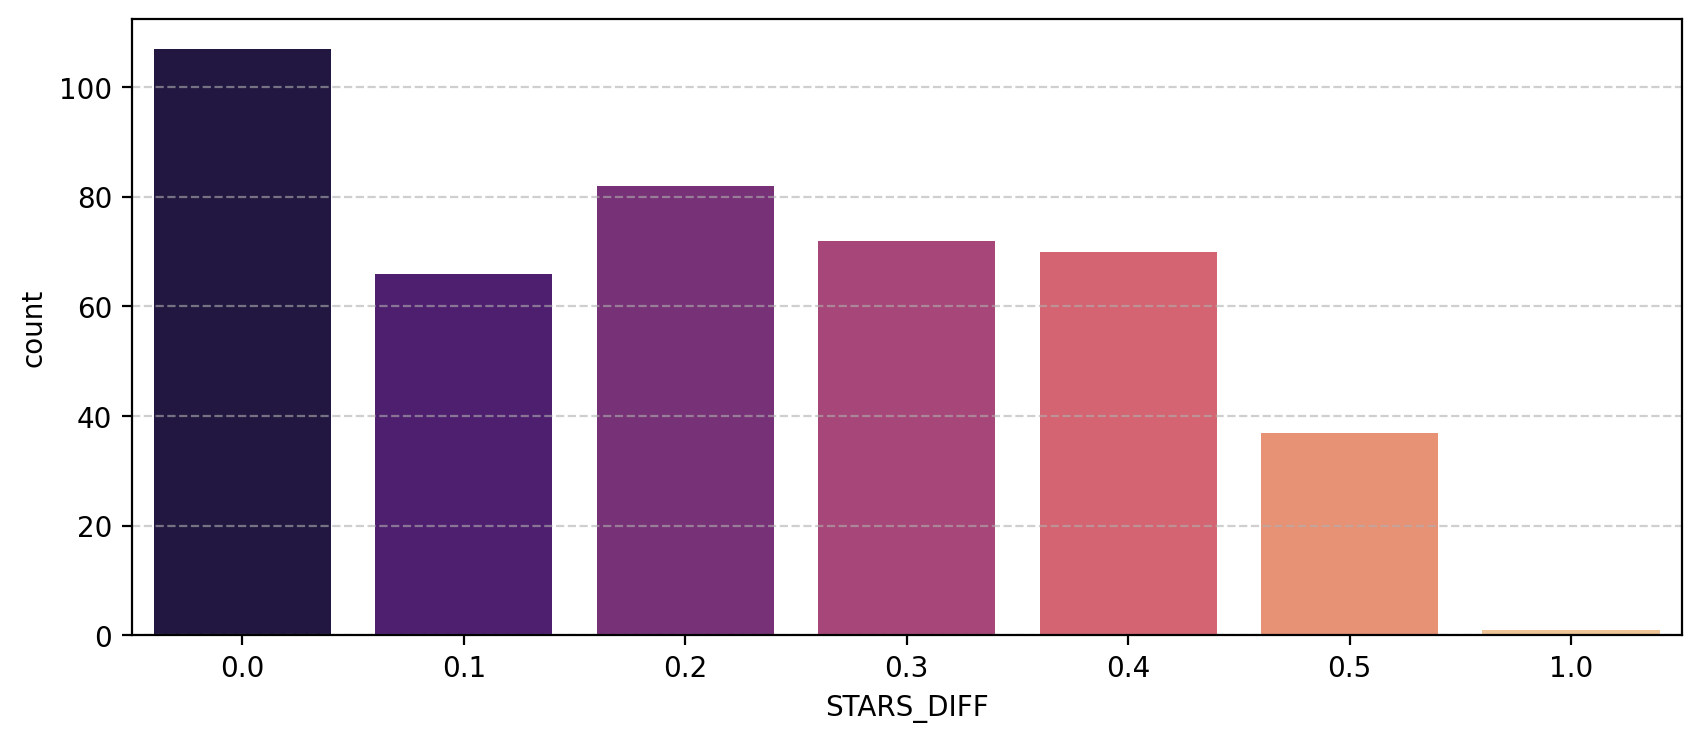

In [85]:
plt.figure(figsize = (10,4),dpi = 200)
sns.countplot(rated_movies, x = 'STARS_DIFF',  palette= 'magma')
plt.grid(True,axis = 'y',  ls = '--', alpha = 0.6)

**Show the movies that has STAR_DIFF of 1**

In [86]:
rated_movies[rated_movies['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


**Data from other sites**

In [87]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [89]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [90]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [91]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


**Rotten Tomatoes**

**Create a scatterplot exploring the relationship between RT critic vs RT user reviews


(0.0, 102.0)

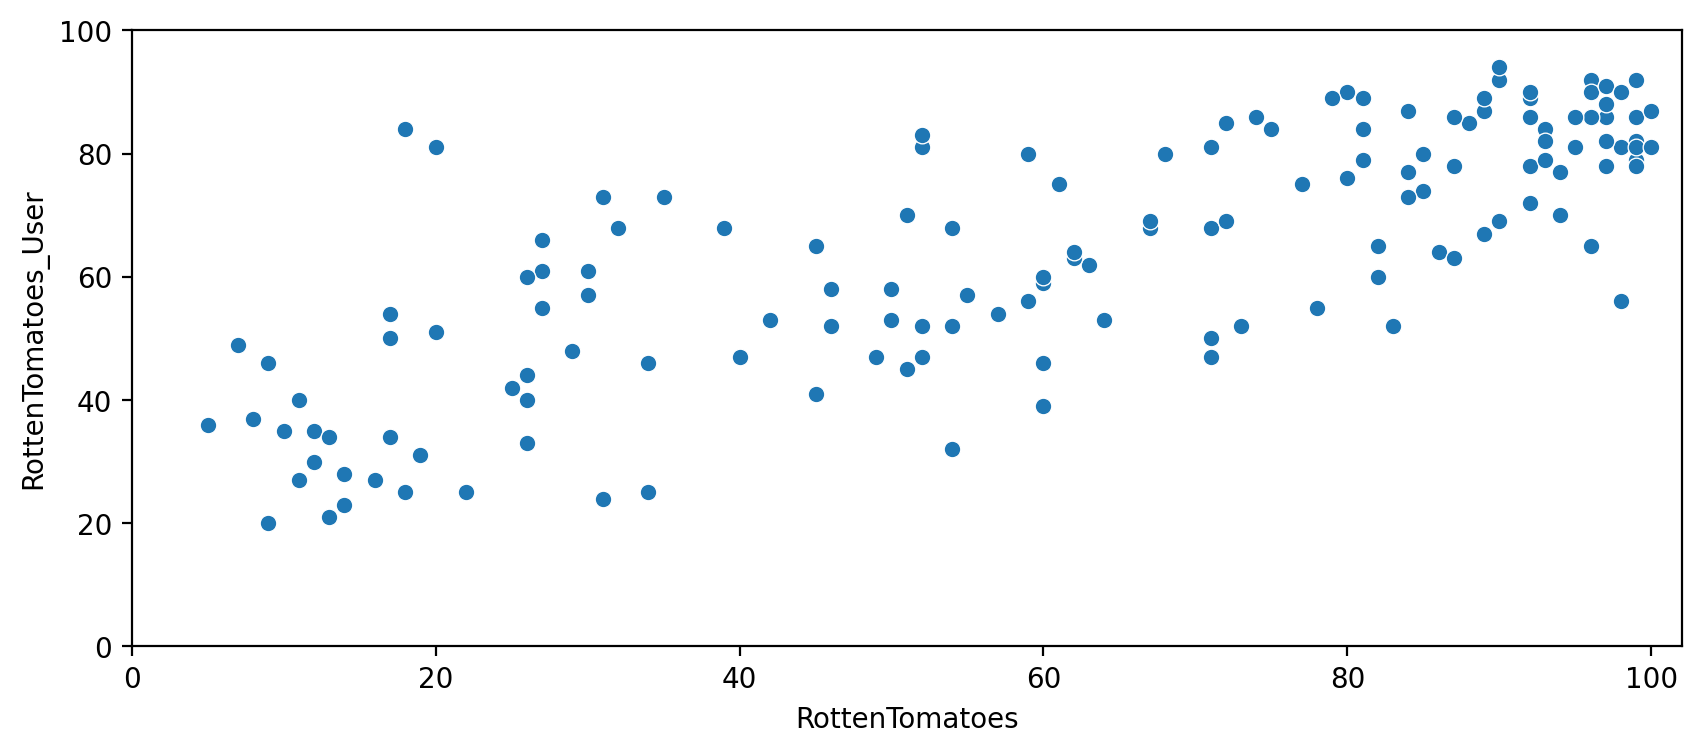

In [97]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.scatterplot(all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')
plt.ylim(0, 100)
plt.xlim(0, 102)

**Create a table for storing diff in critics rating and user ratings**

In [106]:
all_sites["Rt_Diff"] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [107]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RtDiff,Rt_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,-14
...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,19


**Calculate mean absolute of RT_Diff**

In [111]:
float(all_sites['Rt_Diff'].apply(abs).mean().round(3))

15.096

**Create histplot and kdeplot for Rt_Diff**

<Axes: xlabel='Rt_Diff', ylabel='Count'>

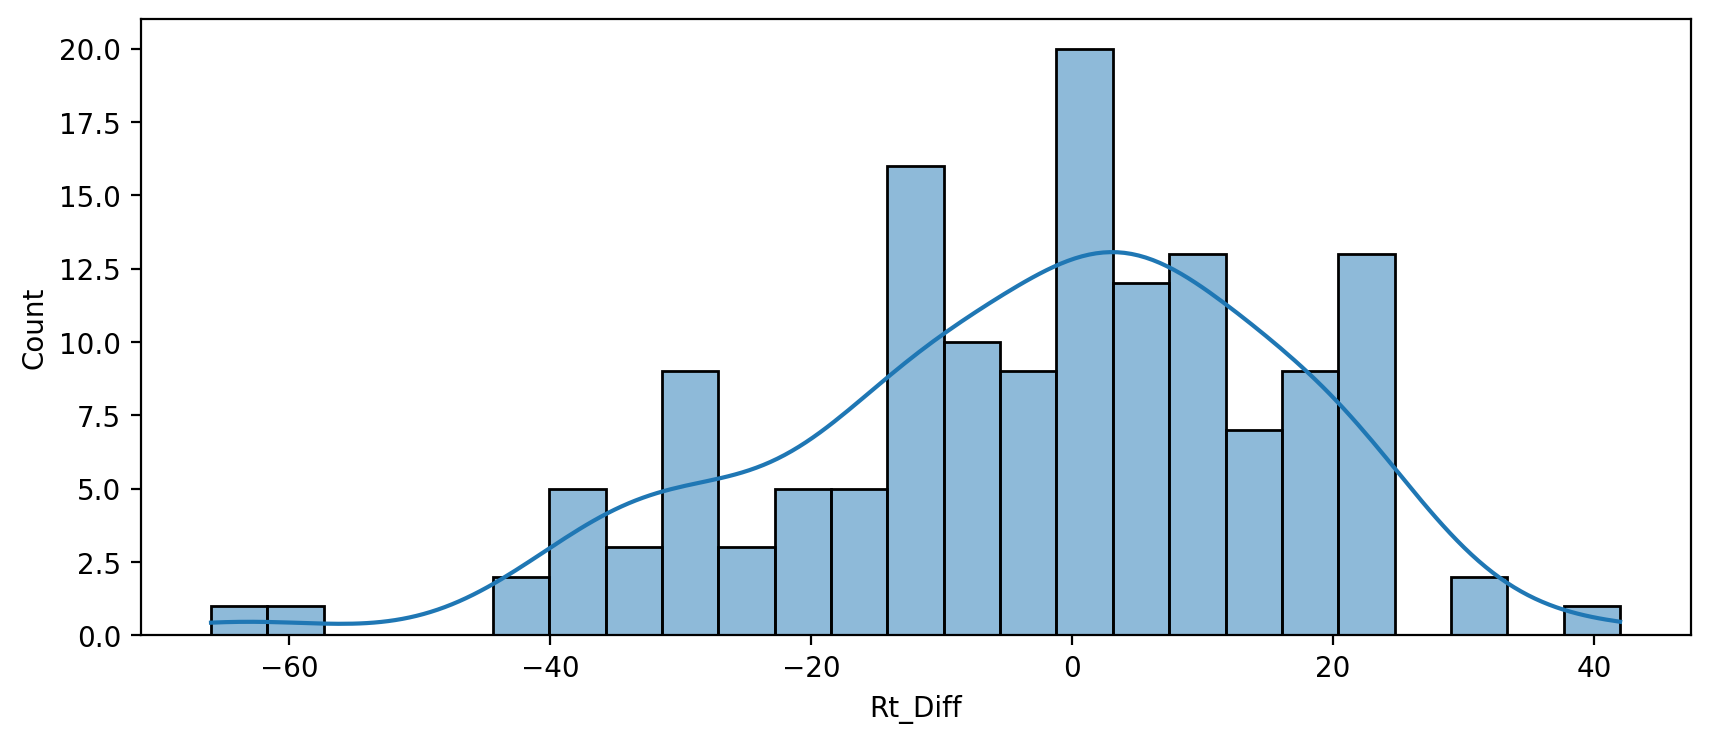

In [115]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.histplot(all_sites, x = 'Rt_Diff', kde = True, bins = 25)

<Axes: xlabel='Rt_Diff', ylabel='Count'>

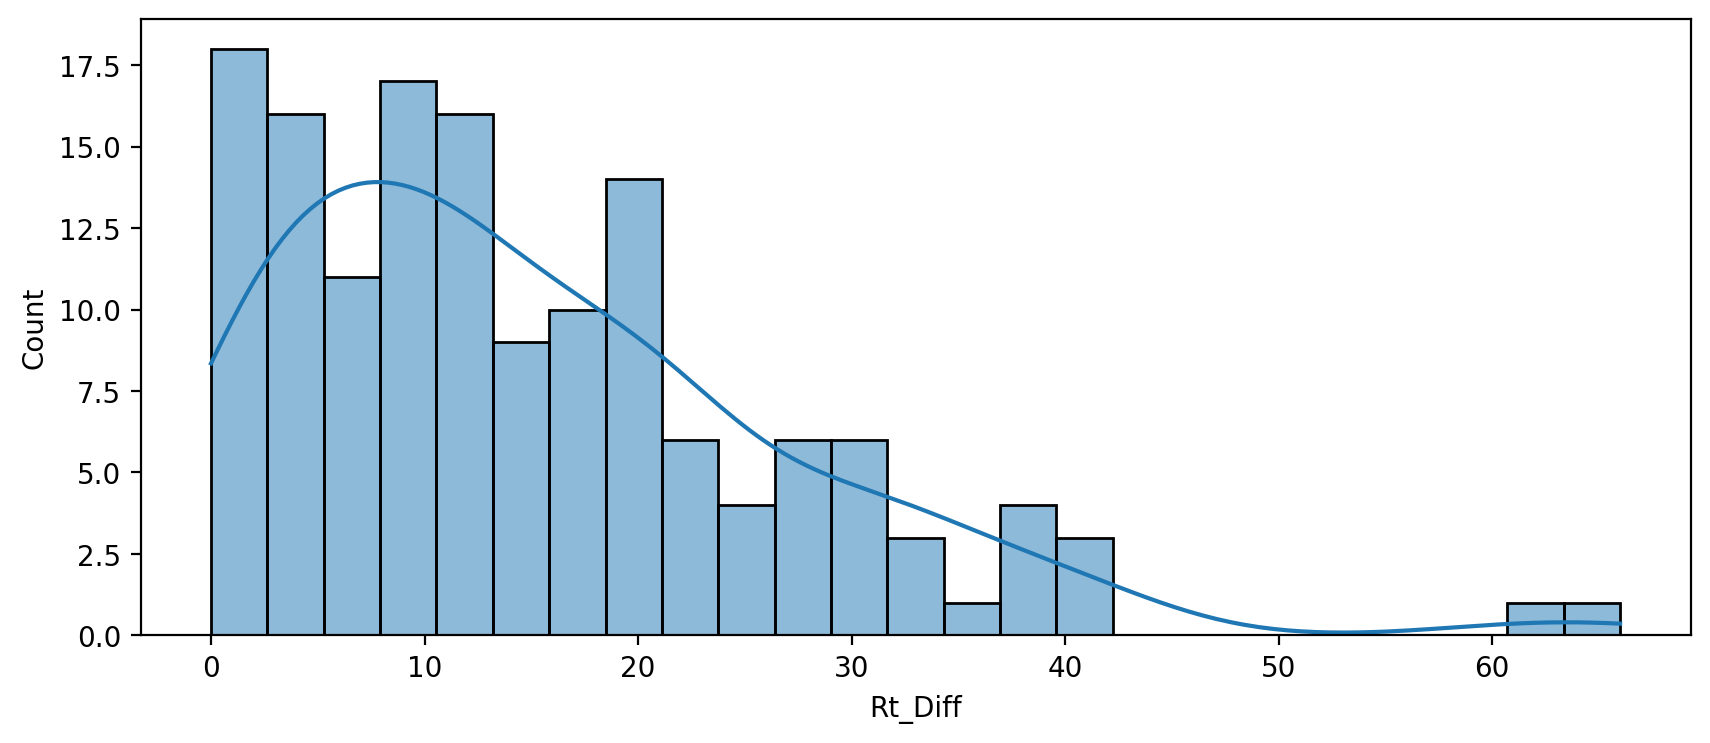

In [118]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.histplot( x =all_sites['Rt_Diff'].apply(abs), kde = True, bins = 25)

**What are the top highest movies user rated higher than critics in Rotten Tomatoes**

In [123]:
all_sites.nsmallest(5, 'Rt_Diff')[['FILM','Rt_Diff']]

,FILM,Rt_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**What are the top highest movies user rated lower than critics in Rotten Tomatoes**


In [124]:
all_sites.nlargest(5, 'Rt_Diff')[['FILM','Rt_Diff']]


,FILM,Rt_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


**Metacritic**

**Display a scatterplot of the Metacritic critic rating vs user rating**

(0.0, 102.0)

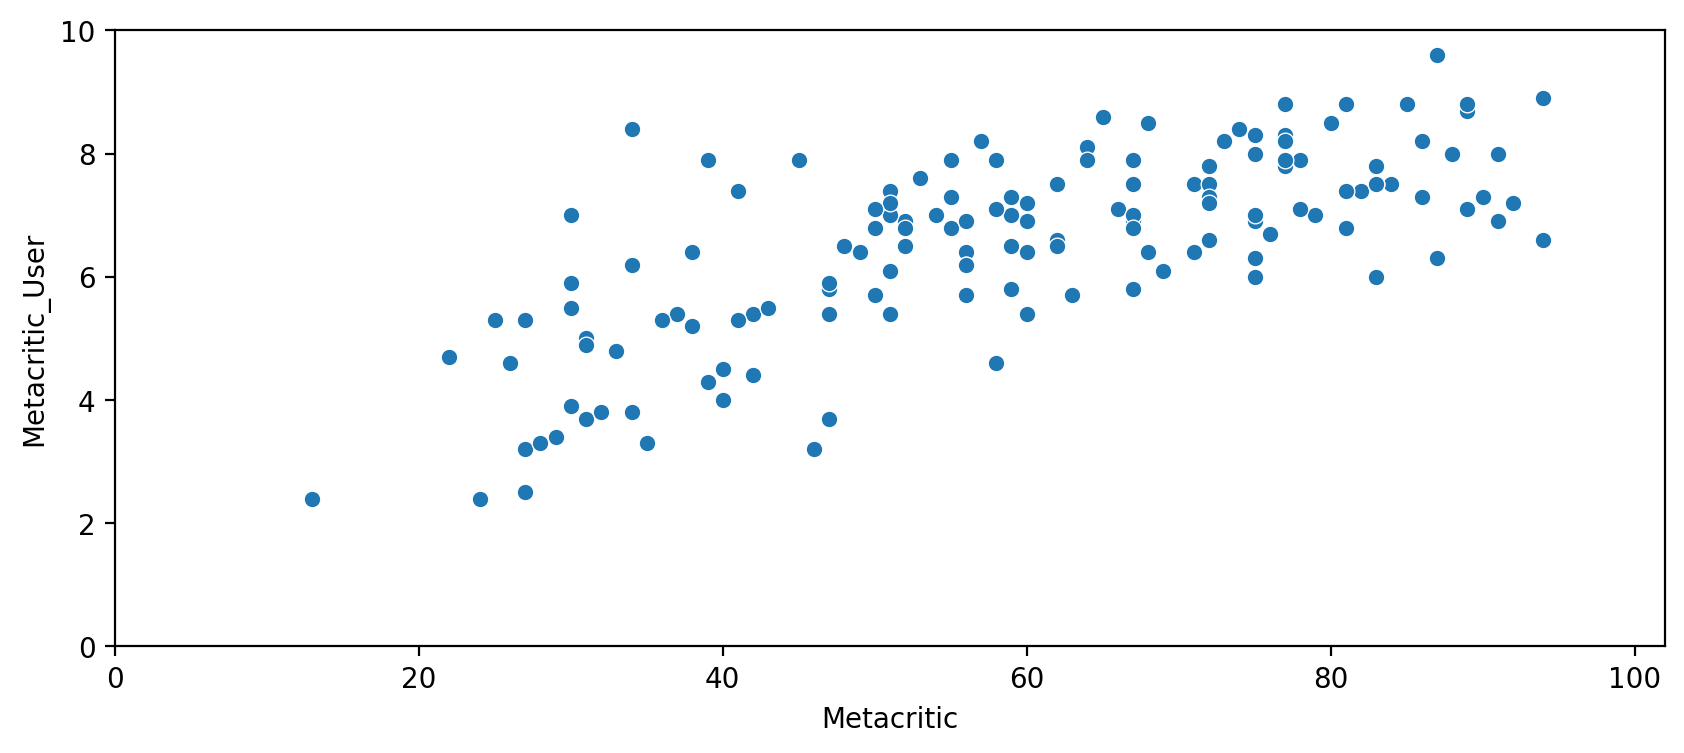

In [126]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.scatterplot(all_sites, x = 'Metacritic', y = 'Metacritic_User')
plt.ylim(0, 10)
plt.xlim(0, 102)

In [127]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RtDiff,Rt_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,-14


**IMDB**

**Create a scatterplot for the relatioship between votecounts on metacritic vs IMDB ratings**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

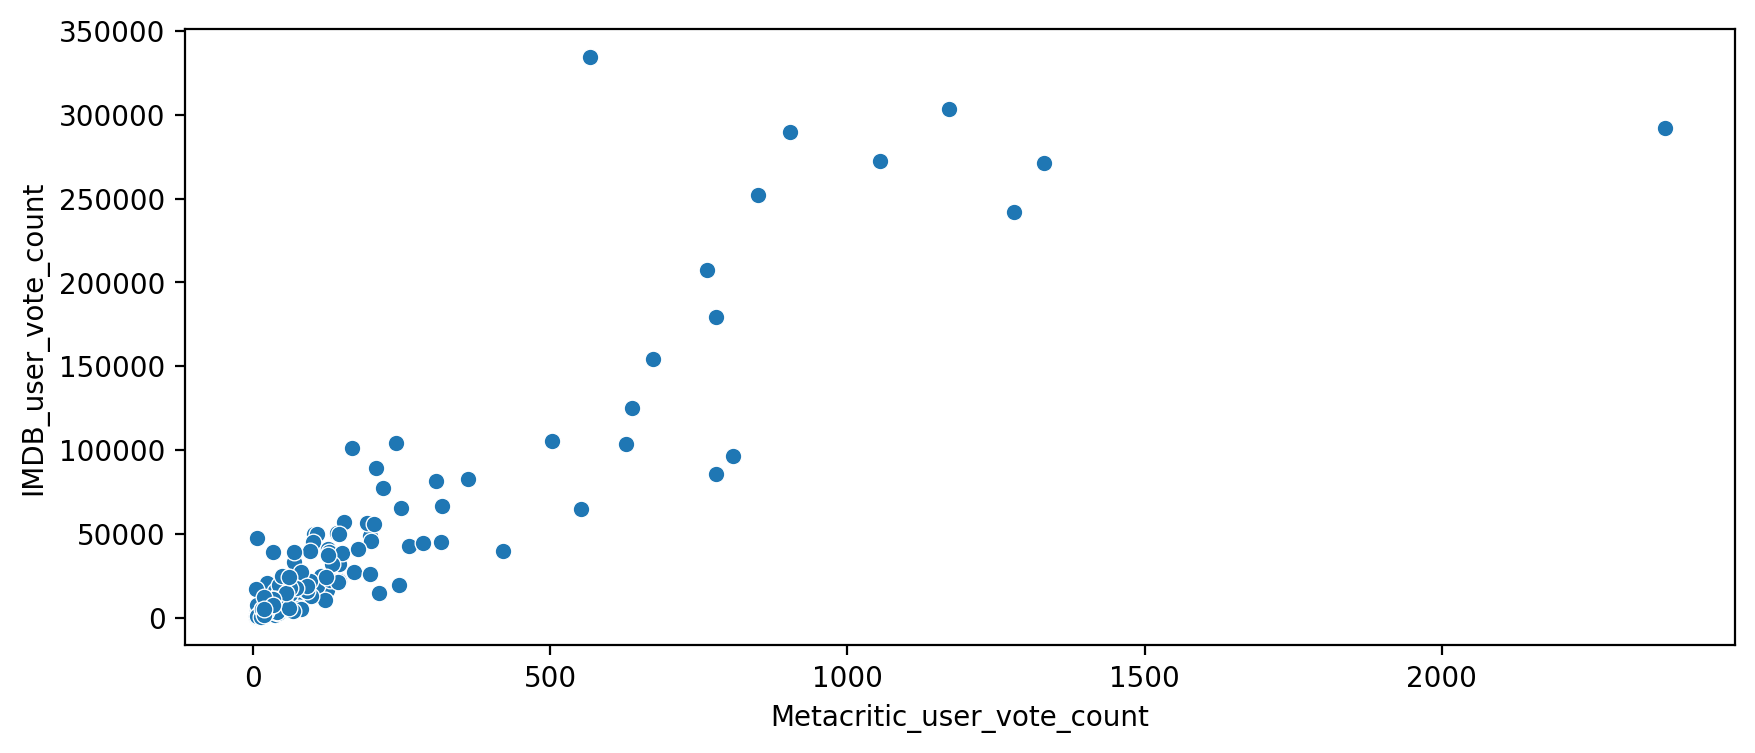

In [130]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.scatterplot(all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

**Movie with highest IMDB vote count**

In [133]:
all_sites.nlargest(1, 'IMDB_user_vote_count')[['FILM', 'IMDB_user_vote_count']]

,FILM,IMDB_user_vote_count
14,The Imitation Game (2014),334164


**Movie with highest Metacritic vote count**

In [134]:
all_sites.nlargest(1,  'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RtDiff,Rt_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


**Fandango Vs All Sites**

**Merge Fandango dataframe with All Sites dataframe**

In [135]:
df =  pd.merge(fandango, all_sites, on = 'FILM', how = 'inner')

In [136]:
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RtDiff,Rt_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9,9


**Normalize columns to fandango stars and rating 0-5**

In [139]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
STARS_DIFF                         0.5
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
RtDiff                            42.0
Rt_Diff                           42.0
Name: max, dtype: float64

In [140]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)

df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)

df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)

In [141]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RtDiff,Rt_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,8,4.9,4.5,4.7,4.4,4.3


In [144]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'STARS_DIFF',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RtDiff', 'Rt_Diff', 'RT_Norm', 'RTU_Norm',
       'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [145]:
norm_scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm',
       'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [146]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


**Comparing Distribution of scores across sites**

C:\Users\abhisek bhujel\AppData\Local\Temp\ipykernel_2896\2435169973.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = norm_scores, shade = True, clip =[0,7])


<Axes: ylabel='Density'>

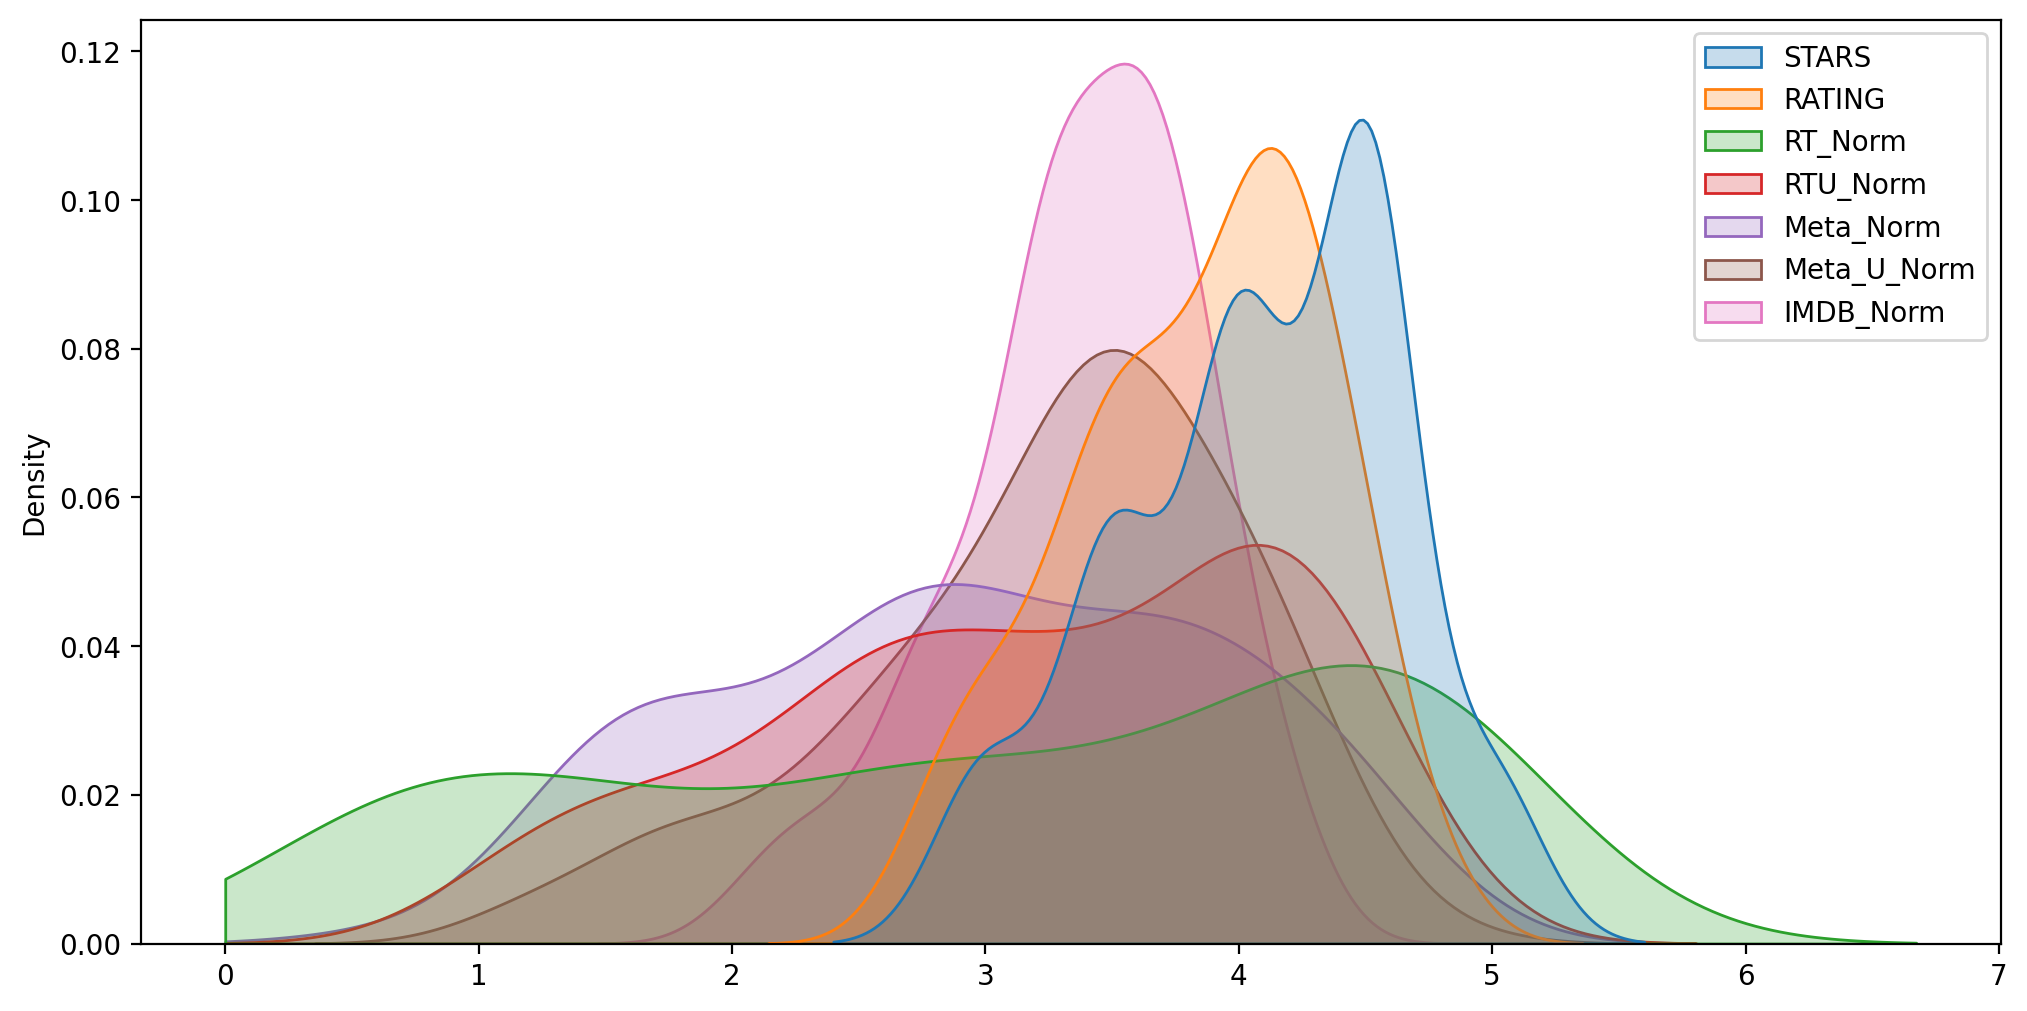

In [152]:
plt.figure(figsize=(12, 6), dpi = 200)
sns.kdeplot(data = norm_scores, shade = True, clip =[0,7])

**Compare fandango Ratings with Rotten tomatoes Rating**

C:\Users\abhisek bhujel\AppData\Local\Temp\ipykernel_2896\2693922551.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = norm_scores[['RT_Norm', 'STARS']], shade = True, clip =[0,7])


<Axes: ylabel='Density'>

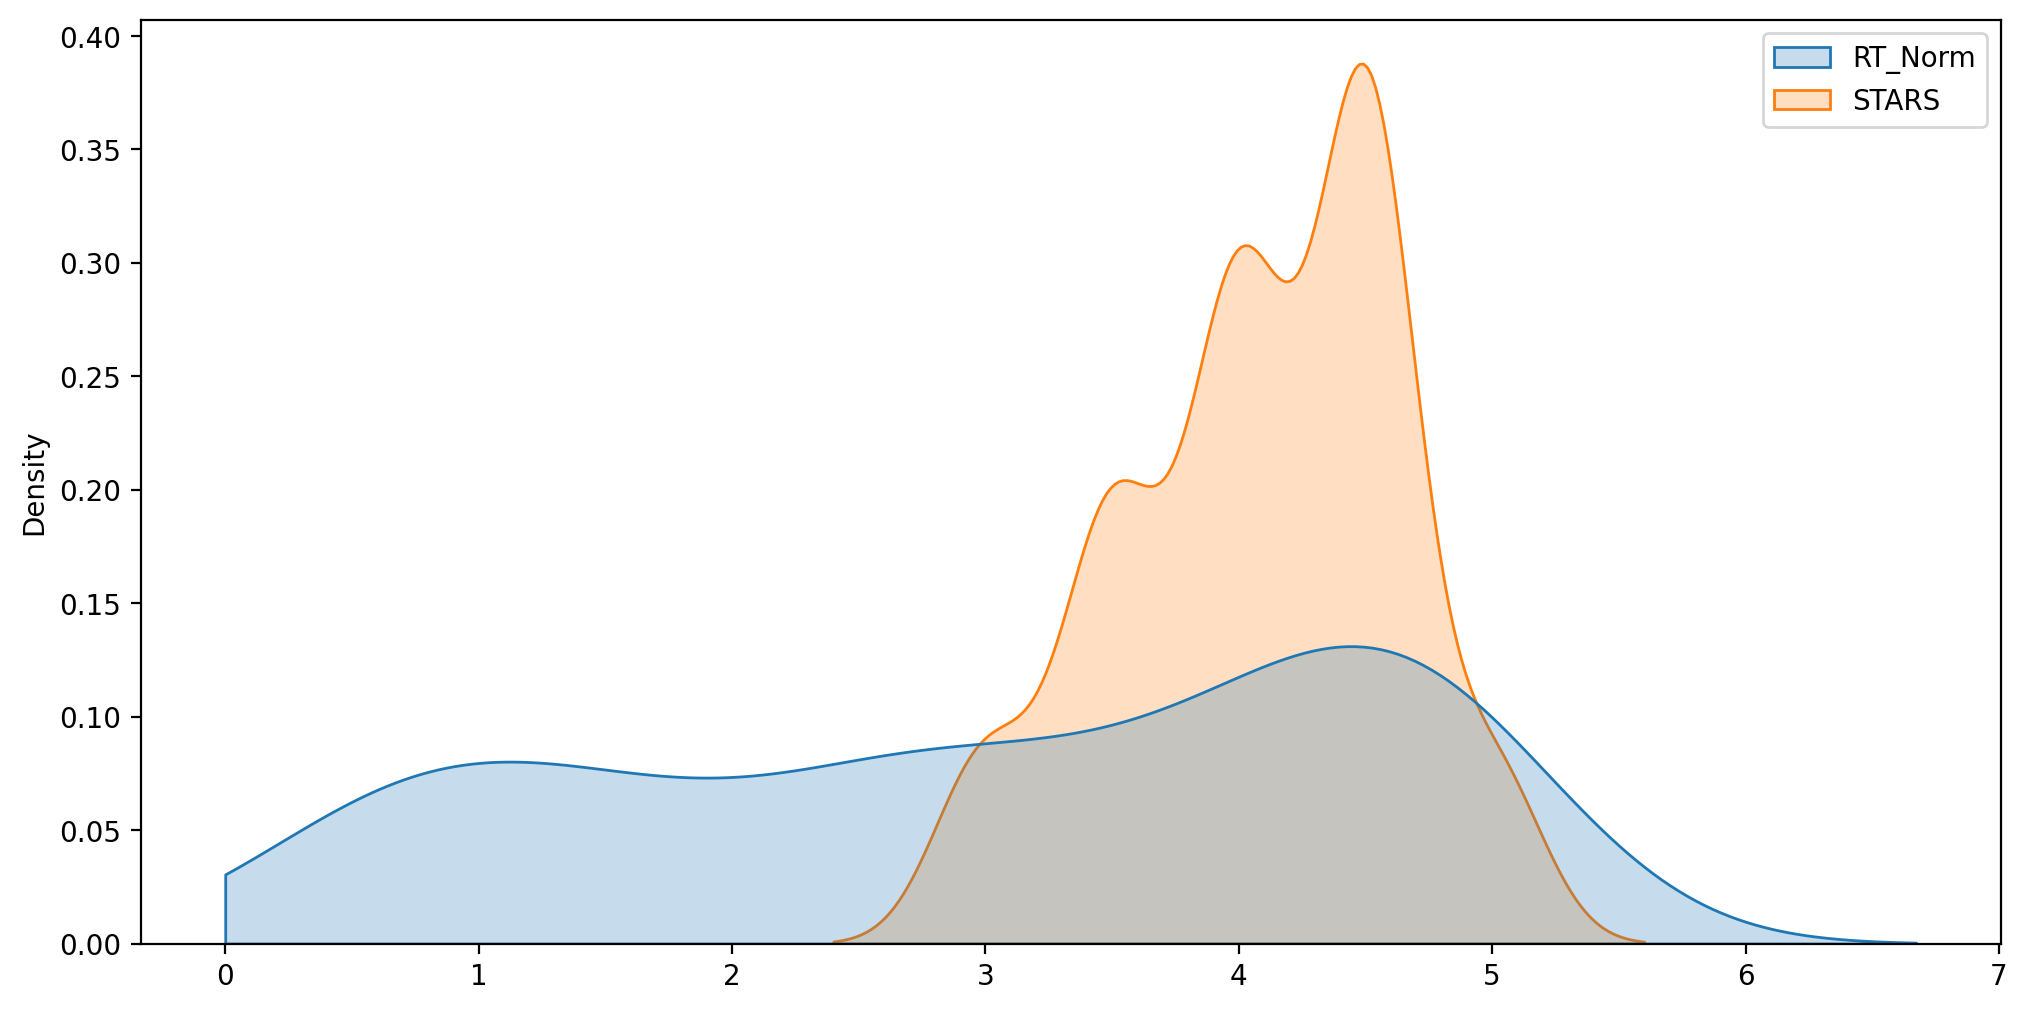

In [153]:
plt.figure(figsize=(12, 6), dpi = 200)
sns.kdeplot(data = norm_scores[['RT_Norm', 'STARS']], shade = True, clip =[0,7])

**Plot histogram for all norm values**

<Axes: ylabel='Count'>

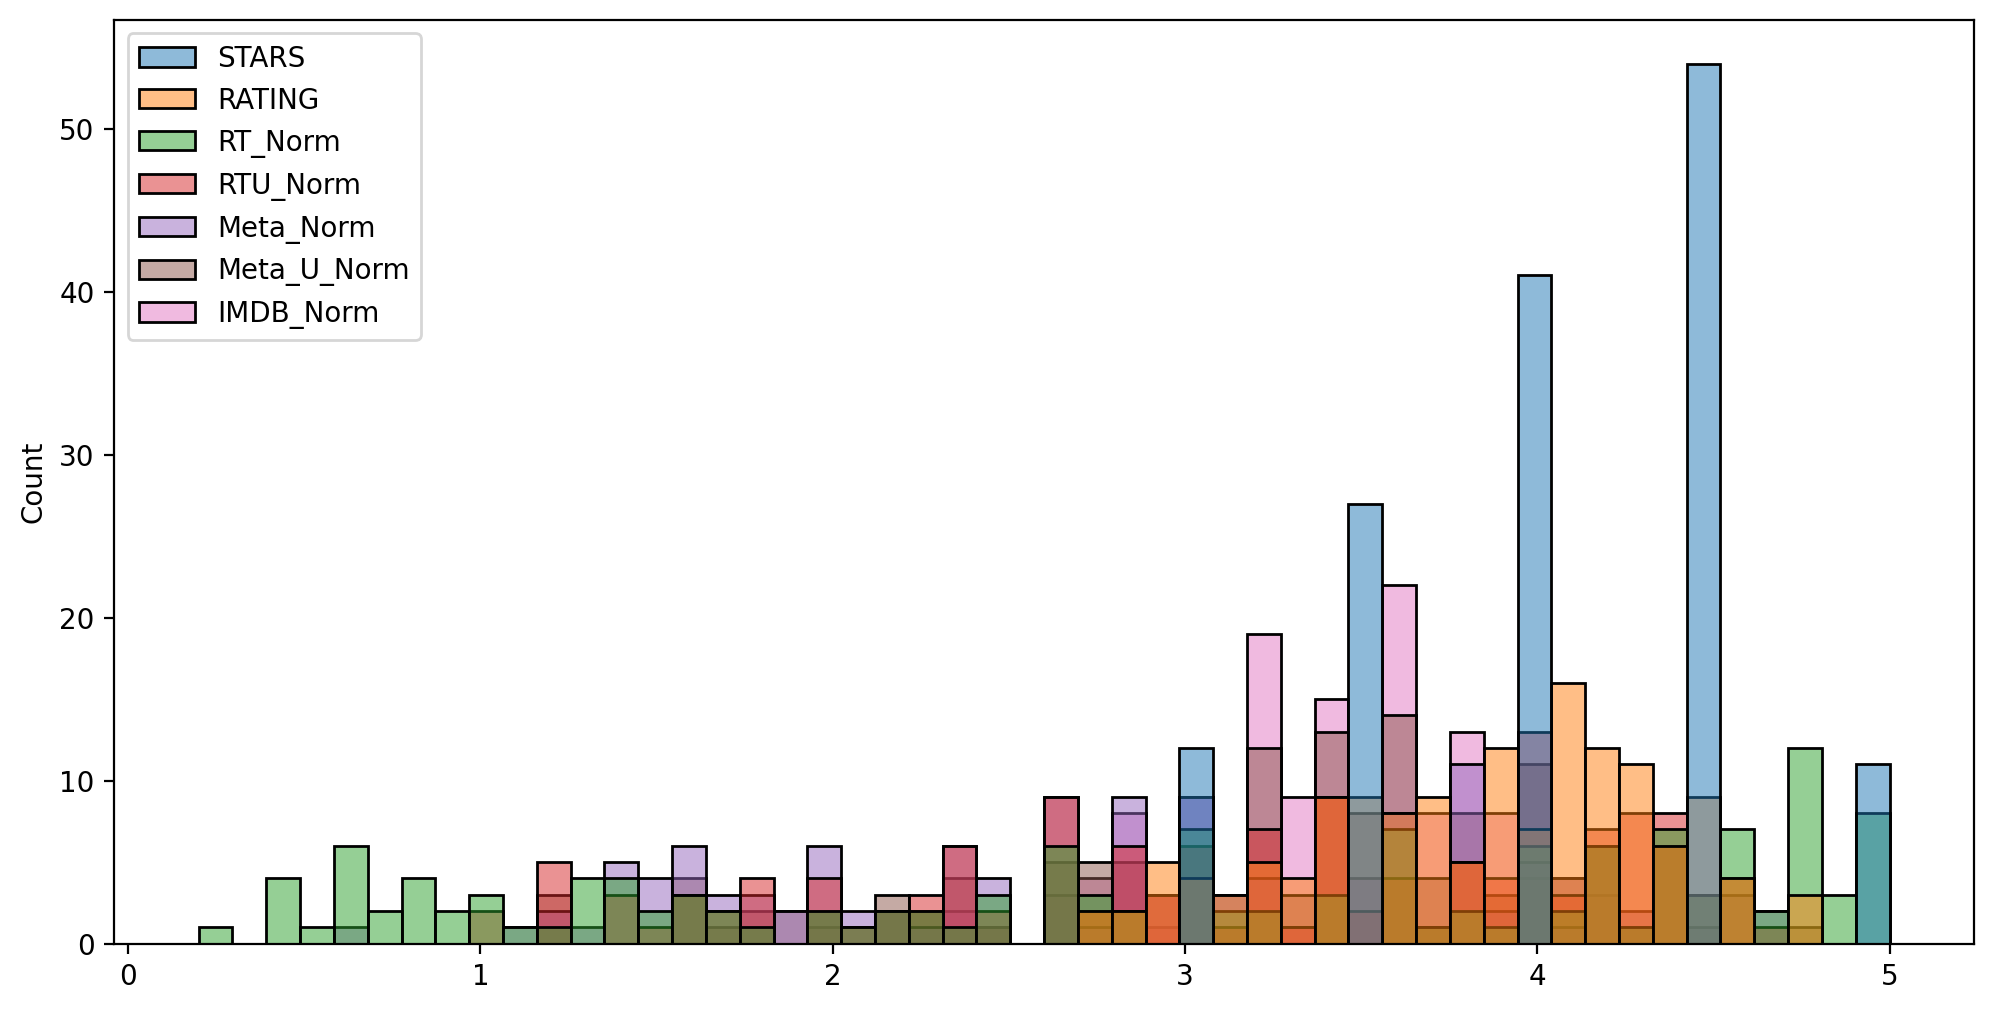

In [156]:
plt.figure(figsize=(12, 6), dpi = 200)
sns.histplot(norm_scores,bins = 50)